In [1]:
from matplotlib.patches import Rectangle
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [28]:
file_path = os.path.join(os.environ.get('rawdir'),'waom','ocean_avg_000?.nc')
print('Load files: ',file_path)
ds = xr.open_mfdataset(file_path,data_vars="minimal")

Load files:  /home/ubuntu/bigStick/tidal_melting/data/analysis/raw/waom/ocean_avg_000?.nc


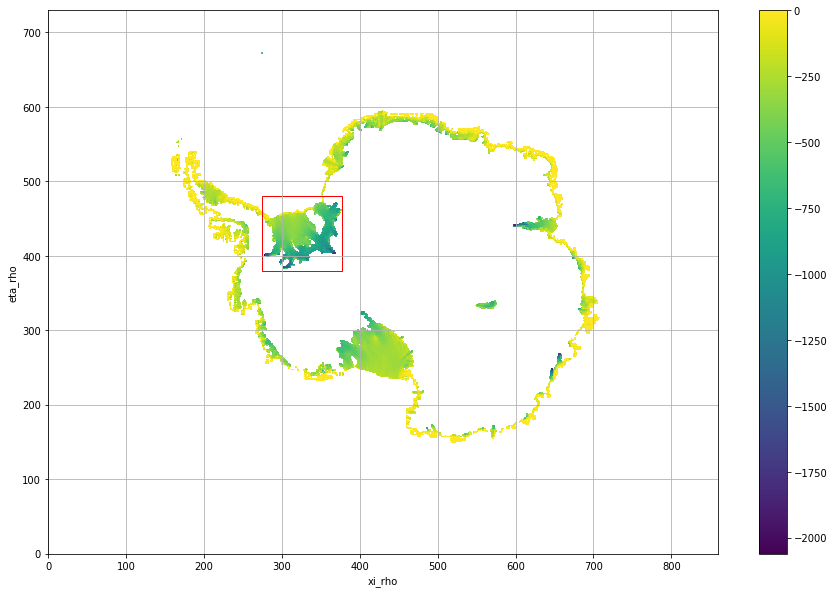

In [29]:
%matplotlib inline
plt.close()
fig,ax1=plt.subplots(1,figsize=(15,10))
ds.zice.where(ds.mask_rho).where(ds.zice<0.0).plot(ax=ax1)
ax1.add_patch(Rectangle((275,380), 102, 100, fill=False,color="r"))
plt.grid(which='both')
plt.show()

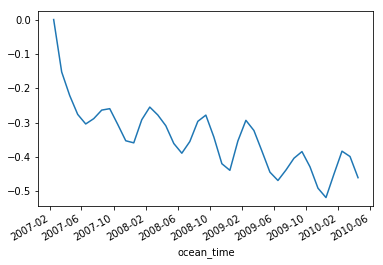

In [35]:
FRIS = ds.isel(xi_rho=slice(275,377),eta_rho=slice(380,475))
m_avg = FRIS.m.where((FRIS.mask_rho==1) & (FRIS.zice<0.0)).mean(['eta_rho','xi_rho'])
plt.close()
((m_avg[1:]-m_avg[1])/m_avg[1]).plot()
plt.show()

In [27]:
m_avg[1:]/m_avg

<xarray.DataArray (ocean_time: 11)>
dask.array<shape=(11,), dtype=float64, chunksize=(11,)>
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2007-02-15T15:00:00 ...

In [ ]:
FRIS.m.where((FRIS.mask_rho==1) & (FRIS.zice<0.0)).mean